# Kedves Réka és László!

A mai nappal egy új, izgalmas és gyönyörű fejezet veszi kezdetét közös életetekben. Habár kétség sem fér hozzá, hogy már most remekül ismeritek egymást, szerelmetek erősebb és stabilabb, mint valaha, a most kötött házasságatok talán a mai napon még beláthatatlanul hosszú időre szól. Ezen a mindennél boldogabb napon egy csodálatosnak ígérkező közös utazás első lépéseit teszitek meg. Arról azonban sosem szabad elfeledkeznetek, hogy utatok során rengeteg előre még nem látható nehézség, konfliktus és kihívás teszi majd próbára szerelmeteket, amelyek közös kezelésére, átvészelésére és megoldására mindig készen kell majd állnotok. Semmi kétségem afelől, hogy ezeken a próbatételeken minden alkalommal derekasan helytálltok majd, és a most egymás iránt érzett szerelmetek hosszú-hosszú időn keresztül megőrzitek majd!

Mivel számomra is rendkívül fontos a kapcsolatotok, szerelmetek és házasságotok virágoztatása, ápolása, egy apró munkafüzettel készültem nektek, amely házastársi kapcsolatotok vezetéséhez (főként szakmai ártalomból) matematikai alapokon nyugvó iránymutatást tud majd nyújtani. Mint a világon minden folyamat alakulását, egy házasság dinamikáját is differenciálegyenletek határozzák meg. A következőkben az egyik legegyszerűbb matematikai szerelem modell [1] viselkedését fogom ismertetni veletek. A modell paramétereinek beállítasain keresztül lehetőségetek nyílik majd kipróbálni, hogyan alakulnak egyes szeretői viselkedés párok érzései az évek során. Remélem ezen interaktív demonstráció bemutatásán keresztül segíteni tudok nektek tudatosabban és sikeresebben viszonyultok egymás és saját érzéseitekhez.

## Előkészületek a számításokhoz

Először is vegyük fel a rendszer paramétereit. Az ebben a munkafezetben látható értékek mind demonstratív jellegűek, addig ügyeskedtem velük, amíg egy érdekes dinamikai viselkedésre nem jutottam. Kérlek módosítsátok majd őket kényetek, kedvetek és fantáziátok szerint!

Az első és legfontosabb adat amit meg kell adnunk, az egymás iránti érzelmeitek jelenlegi állapota. Ezt mindkettőtök esetében egy valós szám fogja jellemezni, amely pozitív értéke a másikkal szembeni szerelmet (pozitív érzéseket), negatív értéke pedig gyűlöletet (negatív érzéseket) szimbolizál.

In [23]:
r0 = -1 # Réka szerelme a (jelenlegi) kiinduló állapotban
l0 = 1 # Laci szerelme a (jelenlegi) kiinduló állapotban

Ezután definiálnunk kell, hogy a másik iránti érzelmeitek aktuális szintje hogyan befolyásolja az érzéseitek időbeli evolúcióját. Ehhez elegendő csupán két új paraméter bevezetése, amelyek pozitív értékei egy önmegegerősítő érzelmi állapotot (pozitív visszacsatolást), míg negatív értékei egy kételkedő, bizonytalan viszonyulást (negatív visszacsatolást) jellemznek a saját érzéseitekkel szemben.

In [24]:
rr = 1 # Réka viszonyulása a saját érzelmeihez
ll = 1 # Laci viszonyulása a saját érzelmeihez

Végül pedig jellemznünk kell azt is, házastársatok érzései hogyan hatnak a ti saját szerelemérzetetek időbeli változására. Az ehhez bevezetett utolsó két paraméter pontosan ezt hivatott modellezni. Ezek pozitív értékei egy közelségre vágyó viselkedési mintázatot jellemeznek, ahol a partneretek szerelme felerősíti saját érzésiteket, míg a negatív értékei egy olyan távolságtartó magatartásformát írnak le, ahol partneretek érzései negatívan hatnak a sajátjaitokra.

In [25]:
rl = 1 # Réka viszonyulása Laci érzelmeihez
lr = -1 # Laci viszonyulása Réka érzelmeihez

Az előkészületek utolsó lépéseként hívjuk meg a számításokhoz szükséges python könyvtárakat.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Kapcsolatotok alakulásának előrejelzése

A szakirodalom alapján [1] az egymás iránt érzett szerelmetek időbeli alakulását jellemző $r(t)$ és $l(t)$ függvények időbeli alakulását egy lineáris 
$$\begin{bmatrix}\dot{r}(t)\\ \dot{l}(t)\end{bmatrix} = \mathbf{A} \begin{bmatrix}r(t)\\ l(t)\end{bmatrix}, \quad \mathbf{A} = \begin{bmatrix}rr & rl \\ lr & ll\end{bmatrix}, \quad r(0) = r_0, \quad l(0) = l_0,$$
alakú kezdeti érték feladat írja le.

In [27]:
A = np.array([[rr, rl],[lr, ll]]); # szerelmi modell rendszermátrixa

A fent látható differenciálegyenlet rendszer viselkedését, a kapcsolatotok aktuális $r(t) \sim l(t)$ trajektóriáján felül, legszemléletesebben annak fázisportréja segítségével tudjuk vizualizálni. Az alábbi kódrészlet ezt hivatott előállítani.

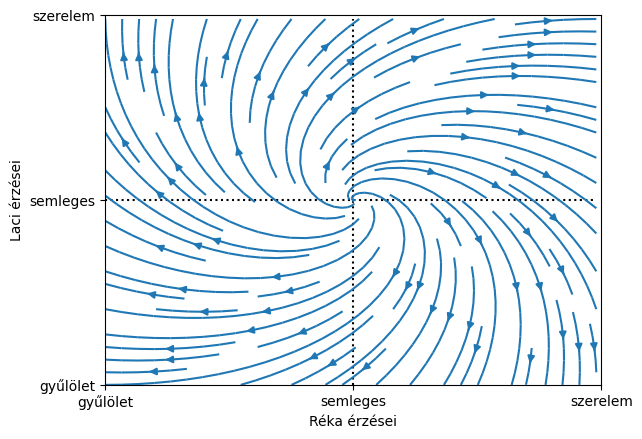

In [44]:
# Egy megfelelően sűrű r-l háló létrehozása az érzéseitek lehetséges kombinációinak leírására
lim = 5 # ábrázolási határok
h = 0.1 # háló felbontása
r = np.arange(-lim, lim, h)
l = np.arange(-lim, lim, h)
R, L = np.meshgrid(r, l)

# A szerelmetek alakulásának fázisportréjának meghatározása és ábrázolása
dr = A[0,0]*R + A[0,1]*L
dl = A[1,0]*R + A[1,1]*L
fig, ax = plt.subplots()
ax.plot(r,0*l,"k:",0*r,l,"k:")
ax.streamplot(R, L, dr, dl, density=1)

# Eredmények ábrázolása, ábra- és tengelyfeliratok
plt.xlim(-lim,lim)
plt.xlabel('Réka érzései')
plt.xticks([-lim, 0, lim],['gyűlölet', 'semleges', 'szerelem'])
plt.ylim(-lim,lim)
plt.ylabel('Laci érzései')
plt.yticks([-lim, 0, lim],['gyűlölet', 'semleges', 'szerelem'])
plt.show(ax)

Az így kapott ábra szemléletesen illlusztrálja számunkra, hogy bizonyos kezdeti $r_0 \sim l_0$ párokból kiindulva milyen jövő várhat a kapcsolatotokra. Numerikus szimuláció segítségével nézzük is meg a fent választott értékek mellett hogyan fognak alakulni egymás iránti érzéseitek.

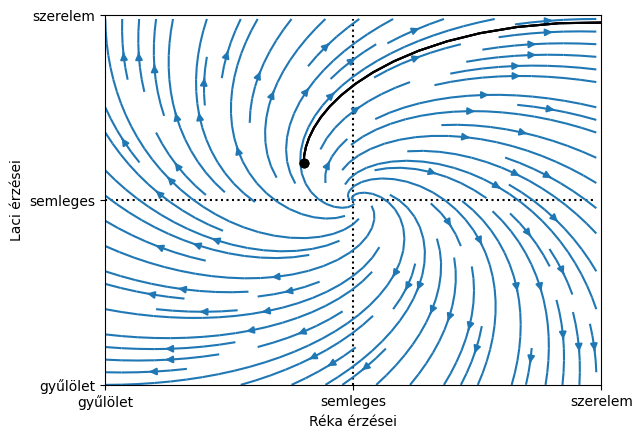

In [47]:
# A jelenlegi állapotból induló kezdeti érték feladat numerikus megoldása
T = 100 # szimuláció hossza
F = lambda t, s: np.matmul(A,s)
sol = solve_ivp(F, [0, T], [r0, l0], t_eval=np.arange(0, T, h))
ax.plot(sol.y[0],sol.y[1],'k')
ax.plot(r0,l0,'ok')
fig

A célotok tehát nem más, mint úgy megválasztani a szerelmeteket leíró rendszer paramétereit és kezdeti feltételeit, hogy a fenti ábrák jobb felső sarka, a kölcsönös szerelem irányába tartsatok! Javaslom ezen kis egyszerű szimuláció segítségével próbáljatok ki minél több kombinációt, hogy a lehető legtudatosabban vezethessétek majd a kapcsolatotokat.

Természetesen az itt bemutatott lineáris egyenletrendszer a szerelem egyik legegyszerűbb modellje, amely sok komplexebb hatást nem képes pontosan leírni. Amennyiben erre lelkesedést éreztek, egészítsétek ki bátran nemlineáris tagokkal a fent felírt kezdeti érték feladatot. Bármilyen felmerülő kérdés esetén forduljatok hozzám bizalommal!

Üdv,

Tüdő

## Hivatkozások:

[1] Strogatz, S. H. (1988). Love affairs and differential equations. Mathematics Magazine, 61(1), 35-35.